<a href="https://colab.research.google.com/github/Niharikasingh722/NLP/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
import pandas as pd

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
train=pd.read_csv("/content/train.csv")
test=pd.read_csv("/content/test.csv")

In [ ]:
train.head()

,text,sentiment
0,"""Her Cardboard Lover"" is Norma Shearer's last ...",0
1,I cannot believe that this movie was ever crea...,0
2,"After ""Beau travail"", everybody was waiting fo...",1
3,Daniel Day-Lewis is the most versatile actor a...,1
4,I had started to lose my faith in films of rec...,1


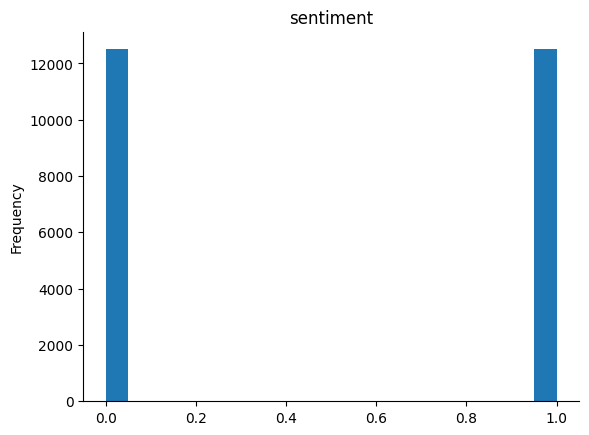

In [ ]:
from matplotlib import pyplot as plt
train['sentiment'].plot(kind='hist', bins=20, title='sentiment')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
import re
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
corpora=train['text']

Removing special symbols and normalization

In [ ]:
corpus=[]
for i in range(len(train)):
  #print(train['text'][i])
  review=re.sub('[^a-zA-Z0-9]'," ",train['text'][i])
  review=review.lower()
  corpus.append(review)


In [ ]:
corpus[0]

' her cardboard lover  is norma shearer s last movie  she quit the movies and  i think  joined the board of directors at mgm  that was a good move on her part   her cardboard lover  was talky and boring in parts  it was obvious there were only a handful of actors with speaking parts so they had a lot of dialogue to speak to keep this turkey afloat   br    br   the story was a good idea about a wealthy woman  norma shearer  hiring a man  robert taylor  to make her playboy fiancee  george sanders jealous  i am surprised that the director  george cukor  did not cut many of the talky scenes between ms  shearer and mr  taylor  mr  cukor served ms  shearer well in  the women  but not in this movie   br    br   the best performance in the movie was given by robert taylor  during mr  taylor s career  he was given his best comedy roles in this movie and  when ladies meet  in 1941  in 1942  he gave his best comedy performance in  her cardboard lover  and  up to then  his best dramatic performanc

Not Removing stop words as it may remove the context of review by removing negative words

Lemmatization

In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
Lemma=WordNetLemmatizer()

In [ ]:
preprocessed_corpus=[]
for i in range(len(corpus)):
  token=corpus[i].split()
  tokens=[Lemma.lemmatize(t) for t in token if len(t)>2]
  token=" ".join(tokens)
  preprocessed_corpus.append(token)

In [ ]:
preprocessed_corpus[0]

'her cardboard lover norma shearer last movie she quit the movie and think joined the board director mgm that wa good move her part her cardboard lover wa talky and boring part wa obvious there were only handful actor with speaking part they had lot dialogue speak keep this turkey afloat the story wa good idea about wealthy woman norma shearer hiring man robert taylor make her playboy fiancee george sander jealous surprised that the director george cukor did not cut many the talky scene between shearer and taylor cukor served shearer well the woman but not this movie the best performance the movie wa given robert taylor during taylor career wa given his best comedy role this movie and when lady meet 1941 1942 gave his best comedy performance her cardboard lover and then his best dramatic performance johnny eager had busy year think all the actor mgm taylor worked with all the major and minor actress the lot also mgm gave taylor all type movie make most them were successful that why mgm

In [ ]:
train['sentiment'].head()

0    0
1    0
2    1
3    1
4    1
Name: sentiment, dtype: int64

In [ ]:
y=train['sentiment'].tolist()

TfIdf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(ngram_range=(1,3),max_features=2500)
X=tfidf.fit_transform(preprocessed_corpus)

In [ ]:
X_arr=X.toarray()

In [ ]:
len(X_arr[0])

2500

using NaiveBayes for classification

In [ ]:
from sklearn.naive_bayes import MultinomialNB
NBModel=MultinomialNB()

In [ ]:
NBModel=NBModel.fit(X_arr,y)

test_preprocessing

In [ ]:
test.columns

Index(['text', 'sentiment'], dtype='object')

In [ ]:
y_true=test['sentiment'].values

In [ ]:
y_true

array([1, 0, 1, ..., 1, 1, 0])

In [ ]:
test_text=test['text'].iloc[:].values

In [101]:
test_corpus=[]
for i in range(len(test_text)):
  review=re.sub('[^a-zA-Z0-9]'," ",test_text[i])
  review=review.lower()
  token=review.split()
  tokens=[Lemma.lemmatize(t) for t in token if len(t)>2]
  token=" ".join(tokens)
  test_corpus.append(token)

In [102]:
test_corpus[0]

'this movie take the voice terror and make better holmes protecting inventor switzerland and the trail professor moriarity who ha become nazi this better version holmes wwii world rathbone doe great job with holmes spy and detective see this you liked the voice terror'

In [103]:
test_preprocessing=tfidf.fit_transform(test_corpus)
y_text=test_preprocessing.toarray()

In [ ]:
y_pred=NBModel.predict(y_text)

In [104]:
print("accuracy score = ",accuracy_score(y_true,y_pred))

accuracy score =  0.50332


In [ ]:
print(confusion_matrix(y_true,y_pred))

[[6529 5971]
 [6446 6054]]


In [105]:
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.52      0.51     12500
           1       0.50      0.48      0.49     12500

    accuracy                           0.50     25000
   macro avg       0.50      0.50      0.50     25000
weighted avg       0.50      0.50      0.50     25000



In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [111]:
RF_model = RandomForestClassifier(n_estimators=1000,max_depth=None)
RF_model.fit(X_arr,y)
y_train_pred=RF_model.predict(X_arr)
y_test_pred = RF_model.predict(y_text)
accTrain = accuracy_score(y, y_train_pred)

accTest = accuracy_score(y_true, y_test_pred)
print("Final accuracy on train data:",accTrain)
print("Final accuracy on test data:",accTest)

print("\nConfusion Matrix on Test Data:")
print(confusion_matrix(y_true, y_test_pred))

Final accuracy on train data: 1.0
Final accuracy on test data: 0.56756

Confusion Matrix on Test Data:
[[4530 7970]
 [2841 9659]]


In [115]:
print(classification_report(y_true,y_test_pred))

              precision    recall  f1-score   support

           0       0.61      0.36      0.46     12500
           1       0.55      0.77      0.64     12500

    accuracy                           0.57     25000
   macro avg       0.58      0.57      0.55     25000
weighted avg       0.58      0.57      0.55     25000



Lets try word2Vec to imporve classification report

In [ ]:
import gensim

In [ ]:
def clean_reviews(review):

    # 1. Removing html tags
    review_text = BeautifulSoup(review,"lxml").get_text()

    # 2. Retaining only alphabets and numbers.
    review_text = re.sub("[^a-zA-Z0-9]"," ",review_text)

    # 3. Converting to lower case and splitting
    word_tokens= review_text.lower().split()

    # 4. Remove stopwords
    le=WordNetLemmatizer()
    word_tokens= [le.lemmatize(w) for w in word_tokens]

    cleaned_review=" ".join(word_tokens)
    return cleaned_review

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
sentences=[]
sum=0
for review in preprocessed_corpus:
    sents=tokenizer.tokenize(review.strip())
    sum+=len(sents)
    for sent in sents:
        cleaned_sent=clean_reviews(sent)
        sentences.append(cleaned_sent.split()) # can use word_tokenize also.
print(sum)
print(len(sentences))

25000
25000


In [ ]:
w2vModel=gensim.models.Word2Vec(sentences=sentences,vector_size=300,window=5,min_count=1)

In [ ]:
vocab=list(w2vModel.wv.index_to_key)

now we have vector embeddings of length 300 for each word, use it to create embeddings for sentences.

In [ ]:
from tqdm import tqdm
import numpy as np

In [ ]:
list_sent_vec=[]
for sent in tqdm(sentences):
  sent_vec=np.zeros(300)
  cnt_words=0
  for word in sent:
    if word in vocab:
      word_vec=w2vModel.wv[word]
      sent_vec+=word_vec
      cnt_words+=1
  if cnt_words!=0:
    sent_vec/=cnt_words
  list_sent_vec.append(sent_vec)


100%|██████████| 25000/25000 [11:17<00:00, 36.92it/s]


In [ ]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
train_vec=Scaler.fit_transform(list_sent_vec)

In [ ]:
train_vec[0]

In [96]:
len(train_vec)

25000

performing word2vec for test data

In [100]:
test.shape

(25000, 2)

In [106]:
sentences=[]
sum=0
for review in test_corpus:
    sents=tokenizer.tokenize(review.strip())
    sum+=len(sents)
    for sent in sents:
        cleaned_sent=clean_reviews(sent)
        sentences.append(cleaned_sent.split()) # can use word_tokenize also.
print(sum)
print(len(sentences))


25000
25000


'list_sent_vec=[]\nfor sent in tqdm(sentences):\n  sent_vec=np.zeros(300)\n  cnt_words=0\n  for word in sent:\n    if word in vocab:\n      word_vec=w2vModel.wv[word]\n      sent_vec+=word_vec\n      cnt_words+=1\n  if cnt_words!=0:\n    sent_vec/=cnt_words\n  list_sent_vec.append(sent_vec)\n\ntest_vec=Scaler.transform(list_sent_vec)'

In [107]:
list_sent_vec=[]
for sent in tqdm(sentences):
  sent_vec=np.zeros(300)
  cnt_words=0
  for word in sent:
    if word in vocab:
      word_vec=w2vModel.wv[word]
      sent_vec+=word_vec
      cnt_words+=1
  if cnt_words!=0:
    sent_vec/=cnt_words
  list_sent_vec.append(sent_vec)

test_vec=Scaler.transform(list_sent_vec)

100%|██████████| 25000/25000 [15:36<00:00, 26.69it/s]


Modelling

Not using Naive Bayes as it doesn't support negative values in train data

In [109]:
from sklearn.ensemble import RandomForestClassifier

In [116]:
RF_model = RandomForestClassifier(n_estimators=1000,max_depth=None)
RF_model.fit(train_vec,y)
wv_y_train_pred=RF_model.predict(train_vec)
wv_y_test_pred = RF_model.predict(test_vec)
wv_accTrain = accuracy_score(y, wv_y_train_pred)

wv_accTest = accuracy_score(y_true, wv_y_test_pred)
print("Final accuracy on train data:",wv_accTrain)
print("Final accuracy on test data:",wv_accTest)

print("\nConfusion Matrix on Test Data:")
print(confusion_matrix(y_true, wv_y_test_pred))

Final accuracy on train data: 1.0
Final accuracy on test data: 0.8174

Confusion Matrix on Test Data:
[[10136  2364]
 [ 2201 10299]]


In [118]:
print(classification_report(y_true,wv_y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82     12500
           1       0.81      0.82      0.82     12500

    accuracy                           0.82     25000
   macro avg       0.82      0.82      0.82     25000
weighted avg       0.82      0.82      0.82     25000



The accuracy of prediction has increased considerably with Word2Vector embedding